# Heart Disease Risk Prediction — Logistic Regression (From Scratch)

**Dataset:** `Heart_Disease_Prediction.csv` (270 pacientes, 14 columnas, target: `Heart Disease` = Presence/Absence).  


## 0) Imports y configuración

In [2]:
#library installation
%pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

## 1) Cargar dataset + EDA básica

In [4]:
# CSV Route
CSV_PATH = "Heart_Disease_Prediction.csv"
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
display(df.head())
display(df.tail())

Shape: (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

In [6]:
# Descriptive statistics
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270.0,NaN,NaN,NaN,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,NaN,NaN,NaN,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,NaN,NaN,NaN,3.174074,0.95009,1.0,3.0,3.0,4.0,4.0
BP,270.0,NaN,NaN,NaN,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,NaN,NaN,NaN,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,NaN,NaN,NaN,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,NaN,NaN,NaN,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,NaN,NaN,NaN,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,NaN,NaN,NaN,0.32963,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,NaN,NaN,NaN,1.05,1.14521,0.0,0.0,0.8,1.6,6.2


### 1.1) Variable objetivo (binarización)

Conteos (0=Absence, 1=Presence):
y
0    150
1    120
Name: count, dtype: int64
Tasa de enfermedad (mean y): 0.4444444444444444


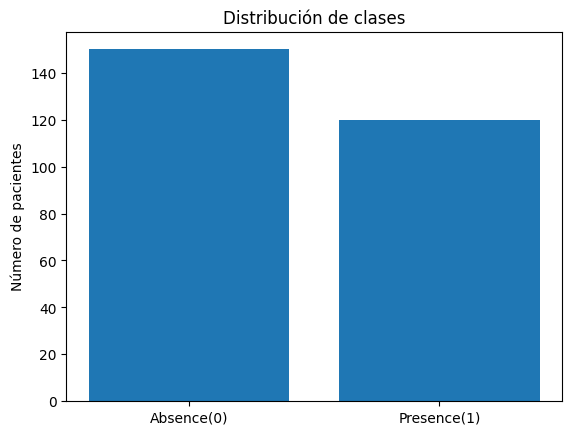

In [7]:
# Target: Heart Disease = Presence / Absence
df["y"] = (df["Heart Disease"] == "Presence").astype(int)

counts = df["y"].value_counts().sort_index()
print("Conteos (0=Absence, 1=Presence):")
print(counts)
print("Tasa de enfermedad (mean y):", df["y"].mean())

plt.figure()
plt.bar(["Absence(0)", "Presence(1)"], [counts.get(0,0), counts.get(1,0)])
plt.title("Distribución de clases")
plt.ylabel("Número de pacientes")
plt.show()

### 1.2) Valores faltantes y revisión rápida de outliers

In [ ]:

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Boxplots rápidos para detectar outliers (opcionalgoso pero útil)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "y"]
plt.figure(figsize=(14, 5))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot de variables numéricas (inspección de outliers)")
plt.tight_layout()
plt.show()

### 1.3) Selección de features (≥6) y preparación de matrices X, y

In [ ]:
# Selection of ≥6 features (aligned with the statement: age, cholesterol, blood pressure, max HR, ST depression, vessels)
feature_cols = [
    "Age",
    "Cholesterol",
    "BP",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

X = df[feature_cols].values.astype(float)
y = df["y"].values.astype(int)

print("X shape:", X.shape, "y shape:", y.shape)
print("Features:", feature_cols)

### 1.4) 70/30 train/test split (stratified)

In [ ]:
def stratified_train_test_split(X, y, test_size=0.30, seed=42):
    rng = np.random.default_rng(seed)
    idx0 = np.where(y == 0)[0]
    idx1 = np.where(y == 1)[0]
    rng.shuffle(idx0); rng.shuffle(idx1)

    n0_test = int(np.round(len(idx0) * test_size))
    n1_test = int(np.round(len(idx1) * test_size))

    test_idx = np.concatenate([idx0[:n0_test], idx1[:n1_test]])
    train_idx = np.concatenate([idx0[n0_test:], idx1[n1_test:]])

    rng.shuffle(test_idx); rng.shuffle(train_idx)
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, test_size=0.30, seed=42)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train disease rate:", y_train.mean(), "Test disease rate:", y_test.mean())

### 1.5) Standardization using only the train set

In [ ]:
def standardize_fit(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma = np.where(sigma == 0, 1.0, sigma)
    return mu, sigma

def standardize_transform(X, mu, sigma):
    return (X - mu) / sigma

mu, sigma = standardize_fit(X_train)
X_train_n = standardize_transform(X_train, mu, sigma)
X_test_n  = standardize_transform(X_test,  mu, sigma)

print("mu:", mu)
print("sigma:", sigma)

In [ ]:
## 2) Logistic Regression

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(w, b, X, y):
    """Binary cross-entropy"""
    m = X.shape[0]
    z = X @ w + b
    p = sigmoid(z)
    eps = 1e-8
    p = np.clip(p, eps, 1 - eps)
    return -(1/m) * np.sum(y*np.log(p) + (1-y)*np.log(1-p))

def compute_gradient(w, b, X, y):
    m = X.shape[0]
    z = X @ w + b
    p = sigmoid(z)
    err = p - y
    dj_dw = (1/m) * (X.T @ err)
    dj_db = (1/m) * np.sum(err)
    return dj_dw, dj_db

def gradient_descent(X, y, alpha=0.01, num_iters=4000, print_every=400):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    J_hist = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_hist.append(J)

        if print_every and (i % print_every == 0 or i == num_iters - 1):
            print(f"iter {i:4d} | cost {J:.4f}")

    return w, b, np.array(J_hist)

In [ ]:
w, b, J_hist = gradient_descent(X_train_n, y_train, alpha=0.01, num_iters=4000, print_every=400)

plt.figure()
plt.plot(J_hist)
plt.title("Costo vs Iteraciones (sin regularización)")
plt.xlabel("Iteración")
plt.ylabel("Costo (BCE)")
plt.show()

print("w:", w)
print("b:", b)

### 2.1) Prediction and metrics

In [ ]:
def predict_proba(w, b, X):
    return sigmoid(X @ w + b)

def predict_label(w, b, X, threshold=0.5):
    return (predict_proba(w, b, X) >= threshold).astype(int)

def classification_metrics(y_true, y_pred):
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    tp = int(np.sum((y_true == 1) & (y_pred == 1)))
    tn = int(np.sum((y_true == 0) & (y_pred == 0)))
    fp = int(np.sum((y_true == 0) & (y_pred == 1)))
    fn = int(np.sum((y_true == 1) & (y_pred == 0)))

    acc = (tp + tn) / max(1, (tp + tn + fp + fn))
    prec = tp / max(1, (tp + fp))
    rec = tp / max(1, (tp + fn))
    f1 = 2 * prec * rec / max(1e-12, (prec + rec))
    return {"acc": acc, "precision": prec, "recall": rec, "f1": f1, "tp": tp, "tn": tn, "fp": fp, "fn": fn}

train_pred = predict_label(w, b, X_train_n)
test_pred  = predict_label(w, b, X_test_n)

train_metrics = classification_metrics(y_train, train_pred)
test_metrics  = classification_metrics(y_test,  test_pred)

metrics_df = pd.DataFrame([train_metrics, test_metrics], index=["train", "test"])
display(metrics_df)

### 2.2) Quick interpretation of coefficients

In [ ]:
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "w": w,
    "abs(w)": np.abs(w)
}).sort_values("abs(w)", ascending=False)

display(coef_df)

## 3) Visualization of decision boundaries 

In [ ]:
def plot_decision_boundary_2d(w, b, X2, y, feat_names=("x1","x2"), title="Decision boundary"):
    x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
    y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 250),
        np.linspace(y_min, y_max, 250)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = predict_proba(w, b, grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2)
    plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)

    plt.scatter(X2[y == 0, 0], X2[y == 0, 1], s=20, label="Absence (0)")
    plt.scatter(X2[y == 1, 0], X2[y == 1, 1], s=20, label="Presence (1)")

    plt.title(title)
    plt.xlabel(feat_names[0])
    plt.ylabel(feat_names[1])
    plt.legend()
    plt.show()

In [ ]:
# Pairs of features (≥3) for training 2D models and plotting boundaries
pairs = [
    ("Age", "Cholesterol"),
    ("BP", "Max HR"),
    ("ST depression", "Number of vessels fluro"),
]

feat_to_idx = {name: i for i, name in enumerate(feature_cols)}

for f1, f2 in pairs:
    i, j = feat_to_idx[f1], feat_to_idx[f2]
    X2_train = X_train_n[:, [i, j]]

    w2, b2, J2 = gradient_descent(X2_train, y_train, alpha=0.05, num_iters=3000, print_every=0)

    plt.figure()
    plt.plot(J2)
    plt.title(f"Cost vs Iterations(2D: {f1} vs {f2})")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (BCE)")
    plt.show ()

    plot_decision_boundary_2d(
        w2, b2, X2_train, y_train,
        feat_names=(f1, f2),
        title=f"Decision boundary (train) — {f1} vs {f2}"
    )

SyntaxError: unterminated string literal (detected at line 18) (776383817.py, line 18)

## 4) Regularization

In [ ]:
def compute_cost_reg(w, b, X, y, lam):
    m = X.shape[0]
    base = compute_cost(w, b, X, y)
    reg = (lam / (2*m)) * np.sum(w**2)
    return base + reg

def compute_gradient_reg(w, b, X, y, lam):
    m = X.shape[0]
    dj_dw, dj_db = compute_gradient(w, b, X, y)
    dj_dw = dj_dw + (lam/m) * w
    return dj_dw, dj_db

def gradient_descent_reg(X, y, alpha=0.01, num_iters=4000, lam=0.0, print_every=0):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    J_hist = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(w, b, X, y, lam)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        J = compute_cost_reg(w, b, X, y, lam)
        J_hist.append(J)

        if print_every and (i % print_every == 0 or i == num_iters - 1):
            print(f"lam={lam} iter {i:4d} | cost {J:.4f}")

    return w, b, np.array(J_hist)

In [ ]:
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]

rows = []
models = {}

for lam in lambdas:
    w_r, b_r, J_r = gradient_descent_reg(X_train_n, y_train, alpha=0.01, num_iters=4000, lam=lam)

    yhat_train = predict_label(w_r, b_r, X_train_n)
    yhat_test  = predict_label(w_r, b_r, X_test_n)

    mt_train = classification_metrics(y_train, yhat_train)
    mt_test  = classification_metrics(y_test,  yhat_test)

    rows.append({
        "lambda": lam,
        "train_acc": mt_train["acc"],
        "test_acc": mt_test["acc"],
        "train_f1": mt_train["f1"],
        "test_f1": mt_test["f1"],
        "||w||": float(np.linalg.norm(w_r)),
        "final_cost": float(J_r[-1]),
    })
    models[lam] = (w_r, b_r, J_r)

results = pd.DataFrame(rows).sort_values("lambda")
display(results)

In [ ]:
# Comparación de curvas de costo
plt.figure()
for lam in lambdas:
    _, _, J_r = models[lam]
    plt.plot(J_r, label=f"λ={lam}")
plt.title("Cost vs. Iterations (with L2 regularization)")
plt.xlabel("Iteration")
plt.ylabel("Regularized cost")
plt.legend()
plt.show()